In [ ]:
import matplotlib.pyplot as plt
import json
import numpy as np
from PIL import Image
import os
import cv2

In [2]:
def load_annotation(path, img):
    ann = json.load(open(path))
    cut = False
    # load all polygons
    polygons = []
    for shape in ann:
        if shape['properties']['isLocked'] == True:
            region_polygon = shape['geometry']['coordinates']
            co = np.array(region_polygon)[0]
            ymin = np.min(co, axis=0)[1]
            ymax = np.max(co, axis=0)[1]
            xmin = np.min(co, axis=0)[0]
            xmax = np.max(co, axis=0)[0]
            cut = True
        else:
            polygons.append(shape['geometry']['coordinates'])

    # turn poligons to masks
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    for polygon in polygons:        
        if len(polygon) == 1:
            cv2.fillPoly(mask, np.array([polygon], dtype=np.int32), 255)
        else:
            #print (polygon)
            cv2.fillPoly(mask, np.array([polygon[0]], dtype=np.int32), 255)
            cv2.fillPoly(mask, np.array([polygon[1]], dtype=np.int32), 255)
    
    if cut:
        mask_final = mask[ymin:ymax, xmin:xmax]  
        img_final = img[ymin:ymax, xmin:xmax]  
    else:
        mask_final = mask
        img_final = img
    
    return mask_final, img_final

In [11]:
def json_to_mask(img_path, json_path, saveto_dir, saveto_dir_img, name):
    img = plt.imread(img_path)
     
    mask, img_cut = load_annotation(json_path, img)
    plt.imshow(mask)
    plt.show()
    plt.imshow(img_cut)
    plt.show()
    
    nr = img_name[:-4]
    print (name)
    
    mask = Image.fromarray(mask)
    mask.save(saveto_dir+'/'+nr+".png")
    
    image = Image.fromarray(img_cut)
    image.save(saveto_dir_img+'/'+name)

C:\Users\fesi9\OneDrive\Dokumente\Uni\PhD\1- ResolvePAIN P9\3-Ergebnisse\1-Bildauswertung\Annotation und Modelle\NF nachannotation females/json_Feli\001.json


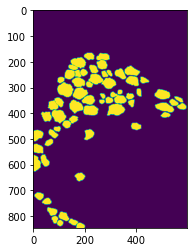

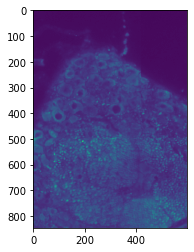

001.tif
C:\Users\fesi9\OneDrive\Dokumente\Uni\PhD\1- ResolvePAIN P9\3-Ergebnisse\1-Bildauswertung\Annotation und Modelle\NF nachannotation females/json_Feli\002.json


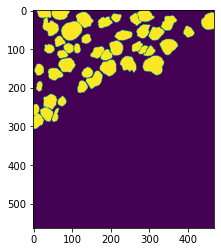

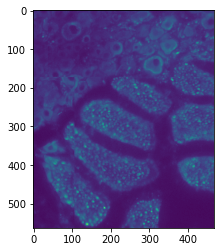

002.tif
C:\Users\fesi9\OneDrive\Dokumente\Uni\PhD\1- ResolvePAIN P9\3-Ergebnisse\1-Bildauswertung\Annotation und Modelle\NF nachannotation females/json_Feli\003.json


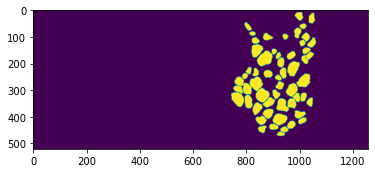

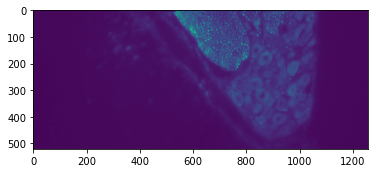

003.tif
C:\Users\fesi9\OneDrive\Dokumente\Uni\PhD\1- ResolvePAIN P9\3-Ergebnisse\1-Bildauswertung\Annotation und Modelle\NF nachannotation females/json_Feli\004.json


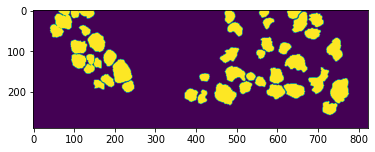

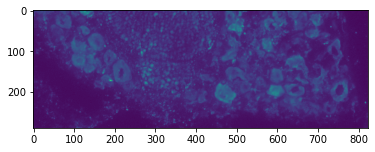

004.tif
C:\Users\fesi9\OneDrive\Dokumente\Uni\PhD\1- ResolvePAIN P9\3-Ergebnisse\1-Bildauswertung\Annotation und Modelle\NF nachannotation females/json_Feli\005.json


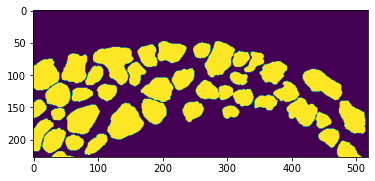

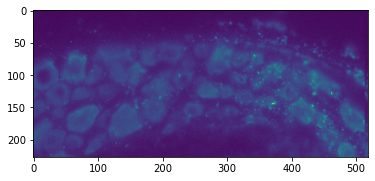

005.tif
C:\Users\fesi9\OneDrive\Dokumente\Uni\PhD\1- ResolvePAIN P9\3-Ergebnisse\1-Bildauswertung\Annotation und Modelle\NF nachannotation females/json_Feli\006.json


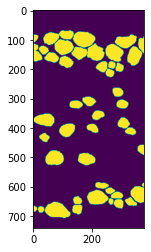

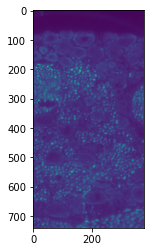

006.tif
C:\Users\fesi9\OneDrive\Dokumente\Uni\PhD\1- ResolvePAIN P9\3-Ergebnisse\1-Bildauswertung\Annotation und Modelle\NF nachannotation females/json_Feli\007.json


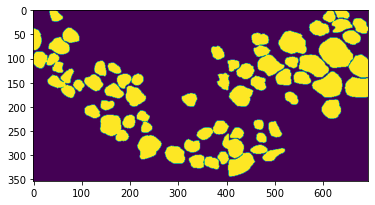

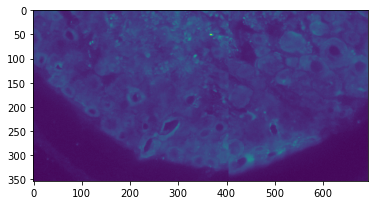

007.tif
C:\Users\fesi9\OneDrive\Dokumente\Uni\PhD\1- ResolvePAIN P9\3-Ergebnisse\1-Bildauswertung\Annotation und Modelle\NF nachannotation females/json_Feli\008.json


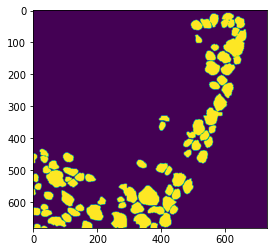

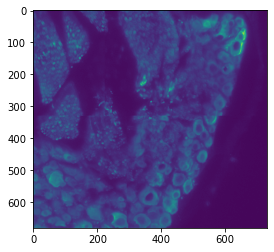

008.tif
C:\Users\fesi9\OneDrive\Dokumente\Uni\PhD\1- ResolvePAIN P9\3-Ergebnisse\1-Bildauswertung\Annotation und Modelle\NF nachannotation females/json_Feli\009.json


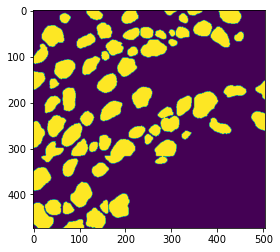

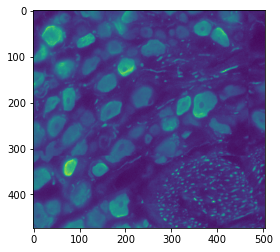

009.tif
C:\Users\fesi9\OneDrive\Dokumente\Uni\PhD\1- ResolvePAIN P9\3-Ergebnisse\1-Bildauswertung\Annotation und Modelle\NF nachannotation females/json_Feli\010.json


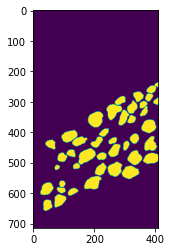

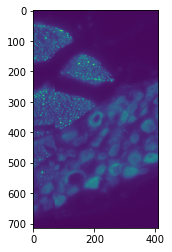

010.tif


In [ ]:
root = r"your_path/markerX annotation/"
annotator = "name"
json_dir = root + "json_"  + annotator      
images_dir = root + "images"

saveto_dir_masks = root + annotator+ "_masks"  
saveto_dir_images = root + "images_cut"

for img_name, json_name in zip(os.listdir(images_dir),os.listdir(json_dir)):
    img_path = os.path.join(images_dir, img_name)
    json_path = os.path.join(json_dir, json_name)
    print(json_path)
    json_to_mask(img_path, json_path, saveto_dir_masks, saveto_dir_images, img_name)